## Ford GoBike System

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import calendar
from IPython.display import Image
%matplotlib inline


### Gather:

In [3]:
df = pd.read_csv('fordgobike-tripdata.csv')
df.head(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No


### Assess:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
#check duplicated record
df.duplicated().sum()

0

In [8]:
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [9]:
df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [10]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [11]:
df.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

In [12]:
df.start_station_name.nunique()

329

In [13]:
df.end_station_name.nunique()

329

In [14]:
df.bike_id.nunique()

4646

##### Quality

1-Convert start_time,end_time dtype to datetime. 

2-member_gender Column has useless values 'Other', these records will also be removed.

3-Convert user_type,Gender and bike_share_for_all_trip to category.

4-Convert bike_id to object/string data type.

5-record all Null values to NaN

6-Convert member_birth_year to int

#### Tidiness

1-Add age take age from member_birth_year columns.

2-Extract month, dayofweek, hour from the start_time

### Clean

In [15]:
# make a copy of the data
df_clean = df.copy()

In [16]:
#defin:1-Convert start_time,end_time dtype to datetime. 
#code
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)
#test
print (df_clean['start_time'].dtypes)
print (df_clean['end_time'].dtypes)

datetime64[ns]
datetime64[ns]


In [17]:
#defin:2-member_gender Column has useless values 'Other', these records will also be removed. 
#code
drop_other = df_clean[df_clean['member_gender']=='Other'].index
df_clean = df_clean.drop(index=drop_other)
#test
df_clean['member_gender'].value_counts()

Male      130651
Female     40844
Name: member_gender, dtype: int64

In [18]:
#defin:3-Convert user_type, member_gender,and bike_share_for_all_trip to category. 
#code
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')
#test
print (df_clean['user_type'].dtypes)
print (df_clean['member_gender'].dtypes)
print (df_clean['bike_share_for_all_trip'].dtypes)

category
category
category


In [19]:
#defin:4-Convert bike_id to object/string data type.. 
#code
df_clean.bike_id = df_clean.bike_id.astype('str')
#test
print (df_clean['bike_id'].dtypes)

object


In [20]:
#defin:5-record all Null values to NaN.
#code
df_clean = df_clean.dropna()
#test
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [21]:
#defin:6-Convert member_birth_year to int.
#code
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype('int')
#test
print (df_clean['member_birth_year'].dtypes)

int32


In [22]:
#defin:1-Add age take age from member_birth_year columns.
#code
df_clean['age_member'] = 2021 - df_clean['member_birth_year']
#test
df_clean.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age_member
141889,895,2019-02-07 17:29:53.831,2019-02-07 17:44:49.453,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,355.0,23rd St at Tennessee St,37.755367,-122.388795,5377,Subscriber,1988,Male,No,33
158377,203,2019-02-05 19:16:15.658,2019-02-05 19:19:39.112,148.0,Horton St at 40th St,37.829705,-122.287610,151.0,53rd St at Hollis St,37.836182,-122.287180,4917,Subscriber,1984,Male,No,37


In [23]:
#defin:2-Extract month, dayofweek, hour from the start_time.
#code
df_clean['start_month']=df_clean.start_time.dt.strftime('%b')

df_clean['start_day_week']= df_clean.start_time.dt.strftime('%a')

df_clean['start_hour']= df_clean.start_time.dt.strftime('%H')
#test
df_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age_member,start_month,start_day_week,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,37,Feb,Thu,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,49,Feb,Thu,12


#### What is the structure of your dataset?

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171305 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171305 non-null  int64         
 1   start_time               171305 non-null  datetime64[ns]
 2   end_time                 171305 non-null  datetime64[ns]
 3   start_station_id         171305 non-null  float64       
 4   start_station_name       171305 non-null  object        
 5   start_station_latitude   171305 non-null  float64       
 6   start_station_longitude  171305 non-null  float64       
 7   end_station_id           171305 non-null  float64       
 8   end_station_name         171305 non-null  object        
 9   end_station_latitude     171305 non-null  float64       
 10  end_station_longitude    171305 non-null  float64       
 11  bike_id                  171305 non-null  object        
 12  user_type       

The Dataset has 20 columns and it has 171385 row.It has different variable types like (int - float - string - bool) but the most type are numeric.  

#### What is/are the main feature(s) of interest in your dataset?

There is many like:

user_type (customer, subscriber),Gender,Age ,day,month and houre

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think start time,member_birth_year,user_type and station names

## Univariate Exploration

##### What is the  user type Distribution?

Text(0.5, 1.0, 'Distribution of Users type')

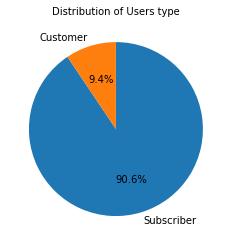

In [25]:
# plot a pie chart
sorted_counts = df_clean['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,counterclock = False, autopct='%1.1f%%');
plt.title('Distribution of Users type',fontsize=10)

90% of the bike users are subscribers,but 9.4% are customer 

##### What is the Gender Distribution?

Text(0, 0.5, 'Number of Users')

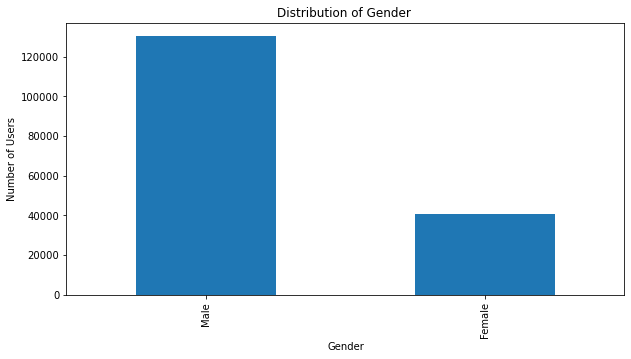

In [26]:
# facetting histograms of member_gender 
df_clean['member_gender'].value_counts().plot(kind="bar",figsize=(10,5))
plt.title('Distribution of Gender ')
plt.xlabel('Gender')
plt.ylabel('Number of Users')

Male is most use of bike.

###### What is the Age Distribution?

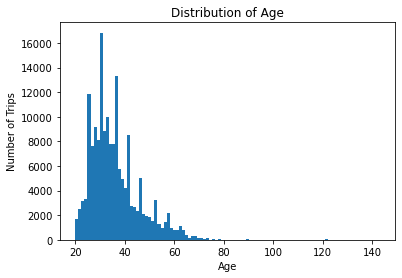

<Figure size 720x360 with 0 Axes>

In [27]:
# facetting histograms of age_member
plt.hist(data = df_clean, x = 'age_member',bins=100)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Trips')
plt.figure(figsize=[10,5])
plt.show()

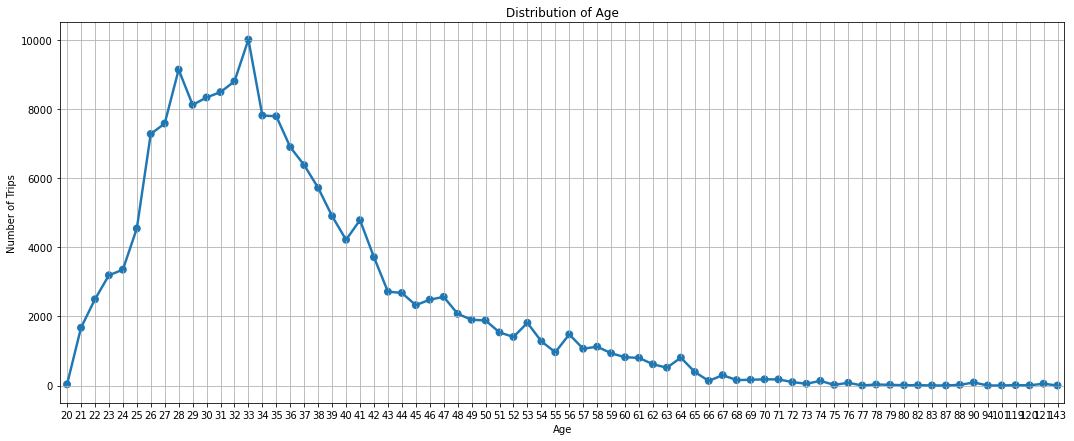

In [28]:
# plot a line plot
plt.figure(figsize=[ 18, 7]);
ag = df_clean.groupby(['age_member']).size().reset_index()
x = sb.pointplot(data=ag ,scale=.9, x='age_member',y=0);
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Trips')
plt.grid()

The most user age between 20 to 40.33 is the most age 

###### What is the Bike rides per weekday Distribution?

In [29]:
start_day_week_counts = df_clean['start_day_week'].value_counts()
start_day_week_counts

Thu    32984
Tue    30022
Wed    27825
Fri    27083
Mon    25106
Sun    14183
Sat    14102
Name: start_day_week, dtype: int64

Text(0, 0.5, 'Number of Trips')

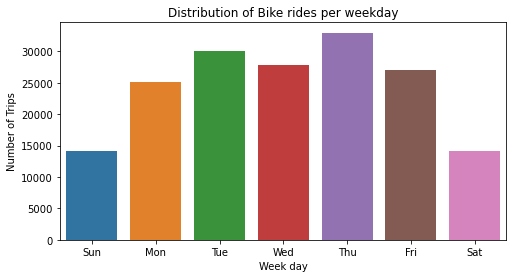

In [30]:
# plot a histogram 
day_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
countplt, ax = plt.subplots(figsize = (8,4))
ax =sns.countplot(x ='start_day_week', data=df_clean, order = day_order )
plt.title('Distribution of Bike rides per weekday')
plt.xlabel('Week day')
plt.ylabel('Number of Trips')

The most use of bike on Thu after that Tue.

What is the Bike rides per month Distribution?

In [31]:
start_month_counts = df_clean['start_month'].value_counts()
start_month_counts


Feb    171305
Name: start_month, dtype: int64

Text(0, 0.5, 'Number of Trips')

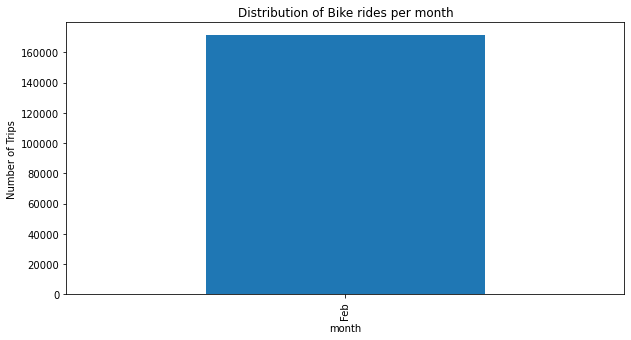

In [32]:
# plot histograms of start_month
df_clean['start_month'].value_counts().plot(kind='bar',figsize=(10,5));
plt.title('Distribution of Bike rides per month')
plt.xlabel('month')
plt.ylabel('Number of Trips')

All data happened at February.

What is the Bike rides per hour Distribution?

In [33]:
start_hour_counts = df_clean['start_hour'].value_counts()
start_hour_counts

17    20497
08    19881
18    15785
09    14907
16    13196
07    10055
19     9210
15     8468
12     8020
13     7906
10     7759
14     7494
11     7298
20     6085
21     4291
06     3258
22     2720
23     1530
00      869
05      860
01      509
02      340
04      215
03      152
Name: start_hour, dtype: int64

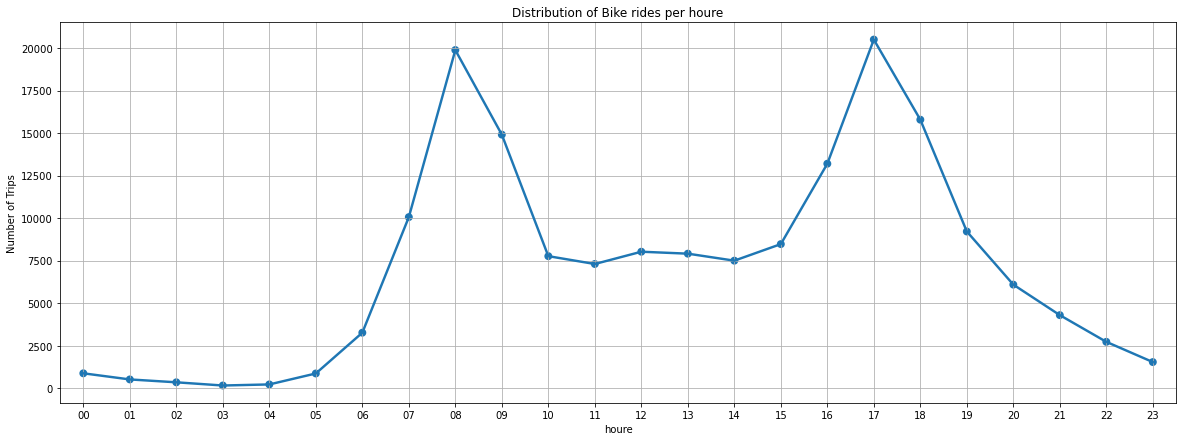

In [34]:
# plot a line plot
plt.figure(figsize=[ 20, 7]);
hh = df_clean.groupby(['start_hour']).size().reset_index()
x = sb.pointplot(data=hh ,scale=.9, x='start_hour',y=0);
plt.title('Distribution of Bike rides per houre')
plt.xlabel('houre')
plt.ylabel('Number of Trips')
plt.grid()

5 PM is the most hours have bikers after that 8 AM.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Nothing seemed unusual.

New columns were created: age_member,start_month,start_day_week and start_hour   
    

#### Of the features you investigated, were there any unusual distributions?

no unusal distributuons

## Bivariate Exploration

##### member_gender vs user_type

Text(0, 0.5, 'count')

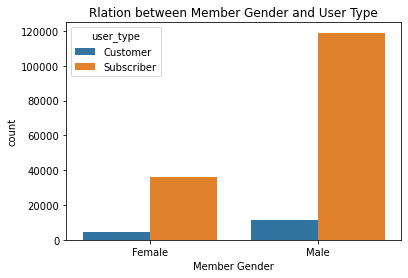

In [35]:
# plot histograms of Member Gender and User Type
sb.countplot(data =df_clean , x = 'member_gender', hue = 'user_type');
plt.title('Rlation between Member Gender and User Type');
plt.xlabel('Member Gender')
plt.ylabel('count')

the most use is subscriber for both feamle and male 

##### member_gender vs start_hour

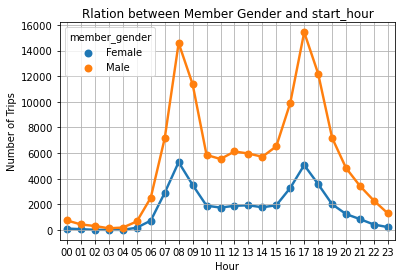

In [36]:
# plot a line plot
gen_hour = df_clean.groupby(['start_hour', 'member_gender']).size().reset_index()
x = sb.pointplot(data=gen_hour,scale=.9, x='start_hour', y=0, hue = 'member_gender');
plt.title('Rlation between Member Gender and start_hour')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.grid()

male have high hours of use than female 

##### user_type vs start_day_week

Text(0, 0.5, 'Number of Trips')

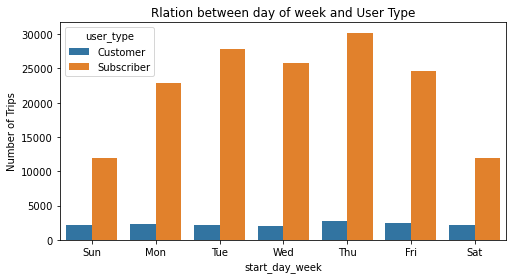

In [37]:
#day_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
countplt, ax = plt.subplots(figsize = (8,4))
ax =sns.countplot(x ='start_day_week',hue = 'user_type', data=df_clean, order = day_order )
plt.title('Rlation between day of week and User Type');
plt.xlabel('start_day_week')
plt.ylabel('Number of Trips')

Thu. has the most bikers in customer and subscriber type. 

##### start_day_week vs start_station_id

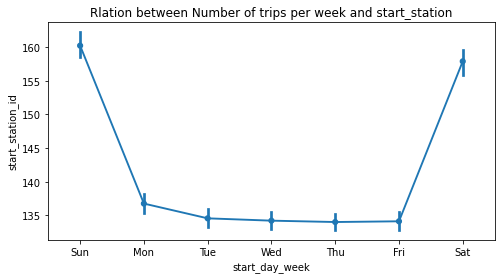

In [38]:
# plot a line plot
#day_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
countplt, ax = plt.subplots(figsize = (8,4))
ax =sns.pointplot(scale=.7, x='start_day_week', y='start_station_id', data=df_clean,order = day_order )
plt.title('Rlation between Number of trips per week and start_station');


The number of trips increases on Saturday.

##### age_member vs member_gender

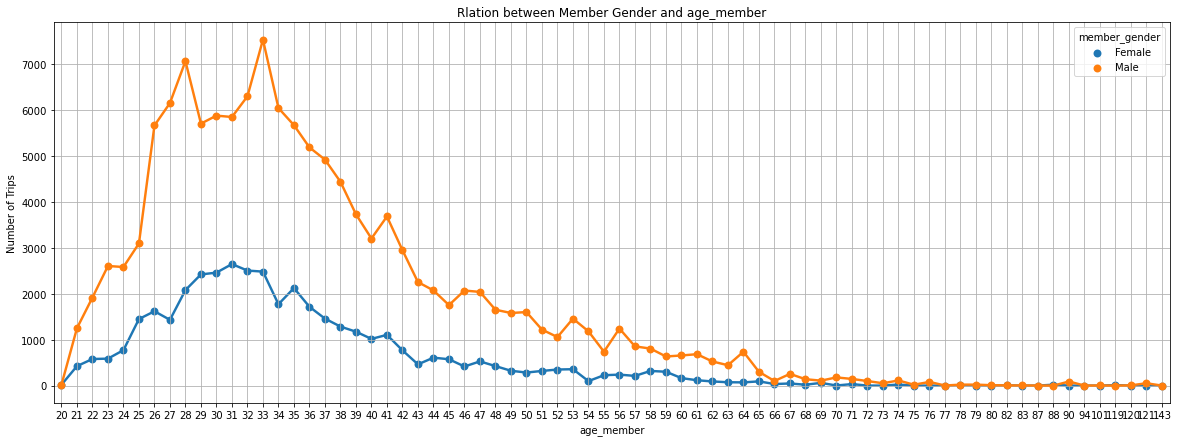

In [39]:
# plot a line plot
plt.figure(figsize=[ 20, 7]);
ag_hour = df_clean.groupby(['age_member', 'member_gender']).size().reset_index()
x = sb.pointplot(data=ag_hour,scale=.9, x='age_member', y=0, hue = 'member_gender');
plt.title('Rlation between Member Gender and age_member')
plt.xlabel('age_member')
plt.ylabel('Number of Trips')
plt.grid()

for male the most age is 33 and for female the most age is 31


## Multivariate exploration

#####  member_gender vs user_type vs start_day_week

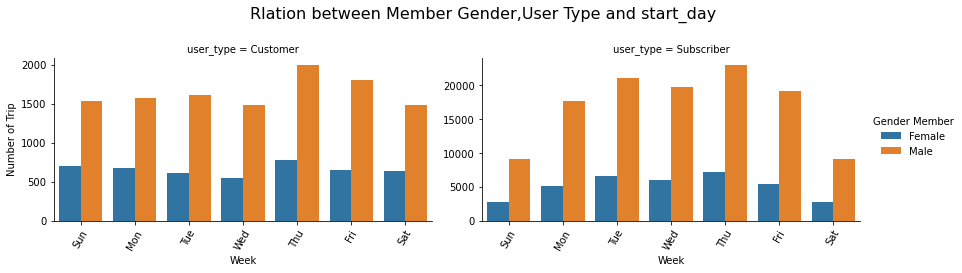

In [40]:
#day_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
ax =sb.catplot(data=df_clean,x='start_day_week', col="user_type",hue="member_gender", kind='count', height=3, aspect=2,sharey = False,order = day_order )
ax.fig.suptitle('Rlation between Member Gender,User Type and start_day',size=16, y=1.12);
ax.set_axis_labels("Week", "Number of Trip")
ax._legend.set_title('Gender Member')
ax.set_xticklabels(rotation=60);

There is no big different between weekly use on coustomer and subscribers.however,Male is more than Female


##### number of trips vs Age Member 

Text(0, 0.5, 'Number of Trips')

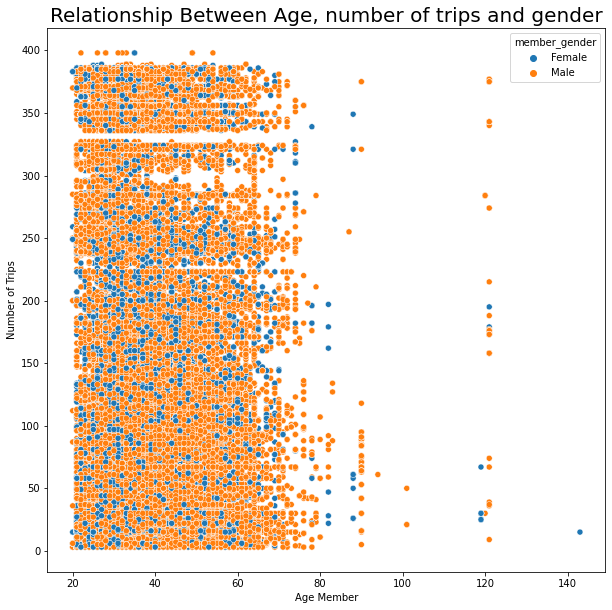

In [41]:
plt.subplots(figsize=(10,10))
x2= sb.scatterplot(data=df_clean, y=df_clean['start_station_id'], x=df_clean['age_member'], hue='member_gender')
plt.title('Relationship Between Age, number of trips and gender', fontsize=20)
plt.xlabel('Age Member', fontsize=10); 
plt.ylabel('Number of Trips', fontsize=10)

There is increase on number of trip in the age between 20 to 60 and Male is more than Female

## Summary

90% of the bike users are subscribers,but 9.4% are customer. 
Male is most use of bike.
The most user age between 20 to 40. 33 old is the most use. 
The most use of bike on Thu after that Tue.
All data happened at February.
5 PM is the most hours have bikers after that 8 AM.
the most use is subscriber for both feamle and male.
male have high hours of use than female. 
Thu. has the most bikers in customer and subscriber type.
The number of trips increases on Saturday. 
for male the most age is 33 and for female the most age is 31.
There is no big different between weekly use on coustomer and subscribers and Male is more than Female
There is increase on number of trip in the age between 20 to 60 and Male is more than Female.

In [42]:
df_clean.to_csv('ford-clean.csv', index=False)